<a href="https://colab.research.google.com/github/be1le/machine-learning/blob/main/Mindall_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### minDALL-E 소스코드 다운로드

In [ ]:
!git clone https://github.com/scpark20/minDALL-E.git

Cloning into 'minDALL-E'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 99 (delta 7), reused 18 (delta 5), pack-reused 73
Unpacking objects: 100% (99/99), done.


### 필요한 라이브러리 설치

In [ ]:
import os
os.chdir('minDALL-E')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 6.5 MB 5.2 MB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |████████████████████████████████| 74 kB 1.0 MB/s 
     |████████████████████████████████| 527 kB 42.5 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 829 kB 47.2 MB/s 
     |████████████████████████████████| 952 kB 46.0 MB/s 
     |████████████████████████████████| 134 kB 49.1 MB/s 
     |████████████████████████████████| 397 kB 50.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.6 MB/s 
     |████████████████████████████████| 112 kB 52.0 MB/s 
     |████████████████████████████████| 271 kB 52.8 MB/s 
     |████████████████████████████████| 144 kB 37.3 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=ce88624d3901647e15547194e1c65246e99185b97585ca6a27cc2bc26f94470c
  Stored in directory: /root/.cache/pip/whe

### minDALLE-E 모델 다운로드

In [ ]:
from matplotlib import pyplot as plt
from dalle.models import Dalle
from dalle.utils.utils import set_seed

device = 'cuda:0'#코랩이다보니까 gpu 
set_seed(0)

model = Dalle.from_pretrained('minDALL-E/1.3B')  # This will automatically download the pretrained model.
model.to(device=device)
print('done')

100%|█████████████████████████████████████| 4.72G/4.72G [04:42<00:00, 17.9MiB/s]
extracting: ./1.3B/tokenizer/bpe-16k-vocab.json (size:0MB): 100%|██████████| 7/7 [00:57<00:00,  8.25s/it]


/root/.cache/minDALL-E/1.3B/tokenizer successfully restored..
/root/.cache/minDALL-E/1.3B/stage1_last.ckpt successfully restored..
/root/.cache/minDALL-E/1.3B/stage2_last.ckpt succesfully restored..
done


### Demo

100%|██████████| 256/256 [02:50<00:00,  1.50it/s]


[[[[1.         1.         0.9656509 ]
   [0.98103845 1.         1.        ]
   [0.9933642  1.         1.        ]
   ...
   [0.99260604 0.9985635  0.9960909 ]
   [1.         1.         0.9971746 ]
   [1.         1.         1.        ]]

  [[1.         0.99310756 0.9823351 ]
   [0.9999192  1.         0.99167264]
   [1.         0.99825895 0.99873745]
   ...
   [0.99214554 0.9967891  0.997023  ]
   [0.9952239  0.9929328  0.9932169 ]
   [0.9976758  0.99169576 1.        ]]

  [[0.9983095  0.99277616 1.        ]
   [0.99676776 0.99700654 0.9956162 ]
   [0.9921539  0.9984757  0.99332154]
   ...
   [1.         0.9940096  0.9999466 ]
   [0.9917604  0.99782896 0.99970806]
   [0.99036133 0.9961921  0.9856386 ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.9975717  0.9982424  1.        ]
   ...
   [1.         1.         1.        ]
   [0.99901664 1.         1.        ]
   [0.98977244 1.         0.9990053 ]]

  [[0.99649286 0.99450624 1.        ]
   [1. 

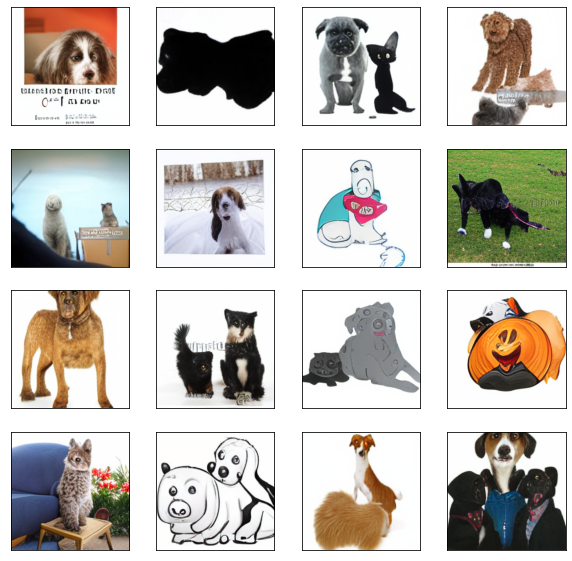

In [ ]:
import numpy as np
import torch
from PIL import Image
prompt = "dog with cat "
images = model.sampling(prompt=prompt,
                        top_k=128, # It is recommended that top_k is set lower than 256.
                        top_p=None,
                        softmax_temperature=1.0,
                        num_candidates=16,
                        device=device).cpu().numpy()
images = np.transpose(images, (0, 2, 3, 1))

print(images)


import matplotlib.pyplot as plt



plt.figure(figsize=[10, 10])
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)#내가한 화면에 몇바이몇으로 띄울거냐 
        plt.imshow(images[i*4+j])
        plt.xticks([])
        plt.yticks([])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
for i in range(16):
    # for j in range(4):
    plt.subplot(1, 1, i)#내가한 화면에 몇바이몇으로 띄울거냐 
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

ValueError: ignored

<Figure size 720x720 with 0 Axes>